In [8]:
import pandas as pd
import matplotlib

In [9]:
file = 'pu_ssocs18.sas7bdat'

In [10]:
df = pd.read_sas(file)
print(df.head())

     SCHID  C0110  C0112  C0114  C0116  C0120  C0121  C0122  C0125  C0129  \
0  b'4225'    1.0    1.0    1.0    2.0    2.0    1.0    2.0    2.0    2.0   
1  b'1274'    1.0    1.0    2.0    2.0    2.0    1.0    1.0    1.0    1.0   
2  b'1986'    1.0    1.0    1.0    2.0    2.0    1.0    2.0    2.0    1.0   
3  b'0029'    1.0    1.0    1.0    2.0    2.0    1.0    1.0    1.0    2.0   
4  b'2234'    1.0    1.0    2.0    2.0    2.0    1.0    2.0    2.0    2.0   

   ...  IC0534  IC0536  IC0538  IC0560  IC0562  IC0568  IC0570  IC0572  \
0  ...    -0.0    -0.0    -0.0    -0.0    -0.0    -0.0    -0.0    -0.0   
1  ...    -0.0    -0.0    -0.0    -0.0    -0.0     7.0    -0.0    -0.0   
2  ...    -0.0    -0.0    -0.0    -0.0    -0.0    -0.0    -0.0    -0.0   
3  ...    -0.0    -0.0    -0.0    -0.0    -0.0    -0.0    -0.0    -0.0   
4  ...    -0.0    -0.0    -0.0    -0.0    -0.0    -0.0    -0.0    -0.0   

   IC0578  IC0580  
0    -0.0    -0.0  
1    -0.0    -0.0  
2    -0.0    -0.0  
3    -0.0   

/usr/local/lib/python3.7/dist-packages/pandas/io/sas/sas7bdat.py:800: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  rslt[name] = self._byte_chunk[jb, :].view(dtype=self.byte_order + "d")
/usr/local/lib/python3.7/dist-packages/pandas/io/sas/sas7bdat.py:809: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  rslt[name] = self._string_chunk[js, :]


In [13]:
col = 'C0560' #<-edit this value! column name as it appears in dataframe
col_name = 'Levels of Crime' #<-edit this value! descriptive name for column
freq = df[col].value_counts().rename_axis(col_name).reset_index(name='freq')
freq = freq.sort_values(by = col_name)
print(freq)

   Levels of Crime  freq
3              1.0   216
1              2.0   615
0              3.0  1547
2              4.0   384


In [19]:
codebook = [['1', 'High level of crime'], #<- if appropriate, replace these values based on codebook or data dictionary for your dataset
            ['2', 'Moderate level of crime'], 
            ['3', 'Low level of crime'], 
            ['4', 'Varying levels of crime']] 
for lbl in codebook:
    freq[col_name] = freq[col_name].replace(int(lbl[0]), lbl[1])
    print(freq)


           Levels of Crime  freq
3  Moderate level of crime   216
1       Low level of crime   615
0  Varying levels of crime  1547
2      High level of crime   384
           Levels of Crime  freq
3  Moderate level of crime   216
1       Low level of crime   615
0  Varying levels of crime  1547
2      High level of crime   384
           Levels of Crime  freq
3  Moderate level of crime   216
1       Low level of crime   615
0  Varying levels of crime  1547
2      High level of crime   384
           Levels of Crime  freq
3  Moderate level of crime   216
1       Low level of crime   615
0  Varying levels of crime  1547
2      High level of crime   384


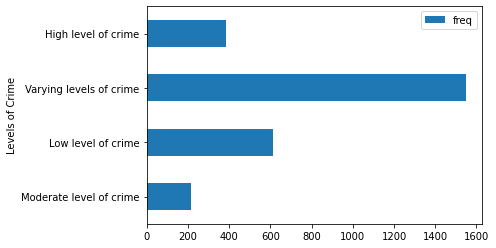

In [20]:
ax = freq.plot.barh(x=col_name, y='freq', rot=0)
